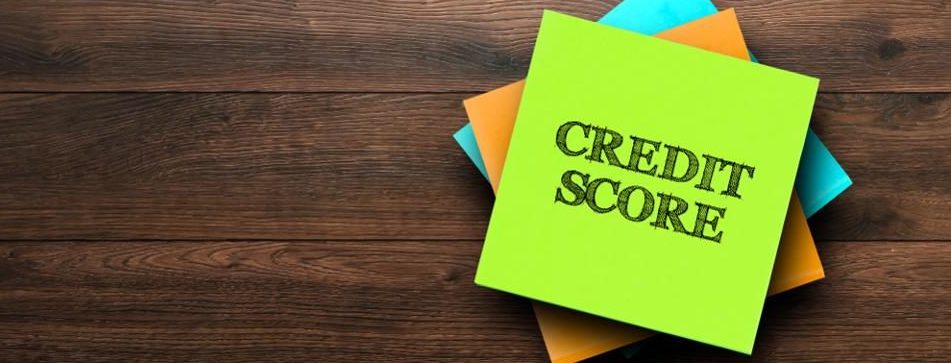

# 0. Project introduction

## 0.1 | What is Credit Score?

### A credit score predicts a borrower's credit behaviour, such as how likely the borrower is to pay a loan back on time, based on information from the borrower's credit reports.

## 0.2 | Understanding the problem
### The business goal is to create a model to predict how good a potential borrower is.

#### 0.3 | Understanding the data
### Data was taken from kaggle.com
### Data has 19 features, such as:
> client_id 

> app_date – last data update

> education – level of education of the borrower

> sex – borrower gender 

> age – borrower age

> car – if borrower has a car

> car_type – type of a car

> decline_app_cnt – number of declined past applications

> good_work – if borrower has a good job

> score_bki – number of requests to the BKI

> bki_request_cnt – number of requests to the BKI

> region_rating – region rating

> home_address – home address categorizer

> work_address – work address categorizer

> income – borrower's income

> sna – communication between the borrower and the bank's customers

> first_time – the age of availability of information about the borrower

> foreign_passport – the presence of a passport

> default – loan default flag

### There are a lot of different features and based on these features good prediction model could be created for sure.

# 1. | Problem solving

## 1.1 | Importing necessary libraries.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Machine Learning tools 
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, auc, accuracy_score, roc_auc_score,f1_score,log_loss,\
classification_report, roc_curve

from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore");

## 1.1 | Loading the dataset

In [2]:
# Import dataset
df = pd.read_csv('Credit-score-dataset.csv')

# Take a look at dataset
df.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01Feb2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12Mar2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01Feb2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23Jan2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18Apr2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0


## 1.2 | Exploring the data

In [3]:
# Get a little more information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [4]:
# Dataset shape
print('Dataset shape:', df.shape)

Dataset shape: (73799, 19)


In [5]:
# Check empty values
df[df.columns[df.isnull().any()]].isna().sum()

education    307
dtype: int64

In [6]:
# Describe dataset
df.describe()

,client_id,age,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,default
count,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000,73799.000000
mean,55137.965094,39.280641,0.275749,0.164894,-1.904724,2.000339,56.725701,1.575509,2.496280,41099.775417,1.733330,2.765458,0.126994
std,31841.921168,11.520378,0.804272,0.371087,0.498231,2.252073,13.055717,0.527631,0.689818,46166.322400,1.123622,1.009463,0.332968
min,1.000000,21.000000,0.000000,0.000000,-3.624586,0.000000,20.000000,1.000000,1.000000,1000.000000,1.000000,1.000000,0.000000
25%,27440.500000,30.000000,0.000000,0.000000,-2.259534,0.000000,50.000000,1.000000,2.000000,20000.000000,1.000000,2.000000,0.000000
50%,55274.000000,37.000000,0.000000,0.000000,-1.920823,1.000000,50.000000,2.000000,3.000000,30000.000000,1.000000,3.000000,0.000000
75%,82758.500000,48.000000,0.000000,0.000000,-1.569831,3.000000,60.000000,2.000000,3.000000,48000.000000,2.000000,4.000000,0.000000
max,110147.000000,72.000000,33.000000,1.000000,0.199773,53.000000,80.000000,3.000000,3.000000,1000000.000000,4.000000,4.000000,1.000000


In [7]:
# Number of unique values the dataset has
df.nunique()

client_id           73799
app_date              120
education               5
sex                     2
age                    52
car                     2
car_type                2
decline_app_cnt        21
good_work               2
score_bki           69096
bki_request_cnt        38
region_rating           7
home_address            3
work_address            3
income                966
sna                     4
first_time              4
foreign_passport        2
default                 2
dtype: int64

In [8]:
df.describe(include=object)

,app_date,education,sex,car,car_type,foreign_passport
count,73799,73492,73799,73799,73799,73799
unique,120,5,2,2,2,2
top,18Mar2014,SCH,F,N,N,N
freq,1018,38860,41562,49832,59791,62733


### How well balanced the dataset is

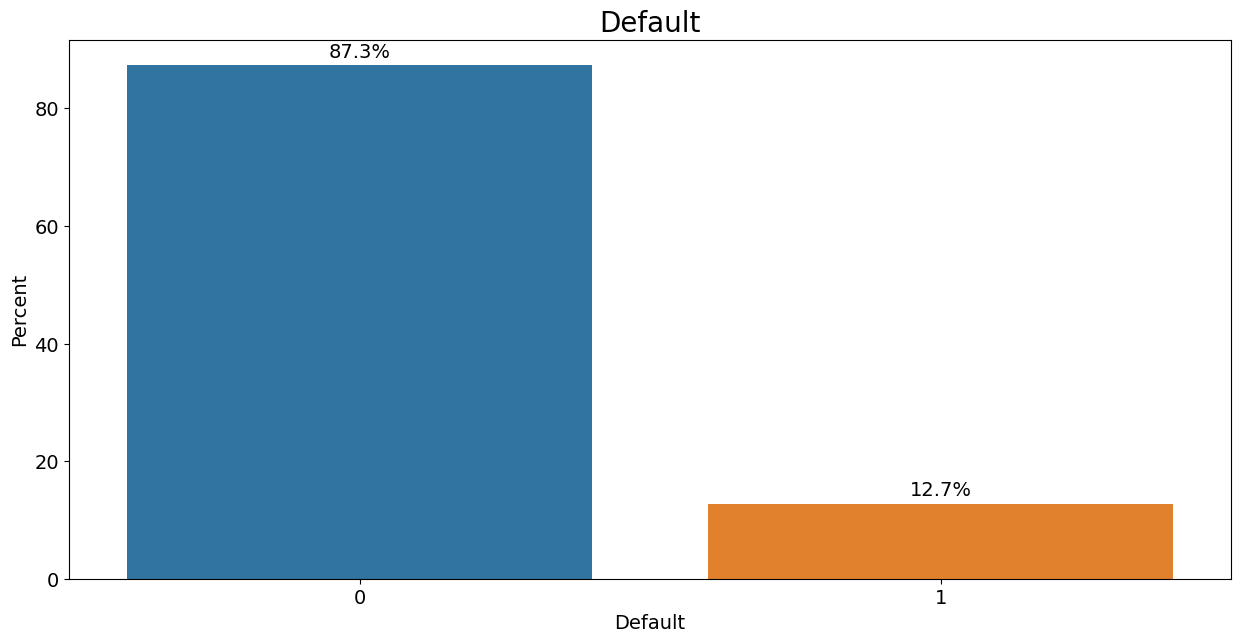

In [9]:
# normaliztion
norm_target = (df
               .default
               .value_counts(normalize=True)
               .mul(100)
               .rename('percent')
               .reset_index())

plt.figure(figsize=(15, 7))
ax = sns.barplot(x='index', y='percent', data=norm_target)

# displaying values above charts
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  
               (p.get_x() + p.get_width() / 2., p.get_height()),  
                ha='center', 
                va='center',
                xytext=(0, 10),
                textcoords='offset points', 
                fontsize=14)

plt.title('Default', fontsize=20)

plt.xlabel('Default', fontsize=14)
plt.ylabel('Percent', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#### There is an imbalance of classes in the dataset, this should be taken into account when training the model

# Age


### Let's take a look at a distribution of 'age' depending on the 'default' flag

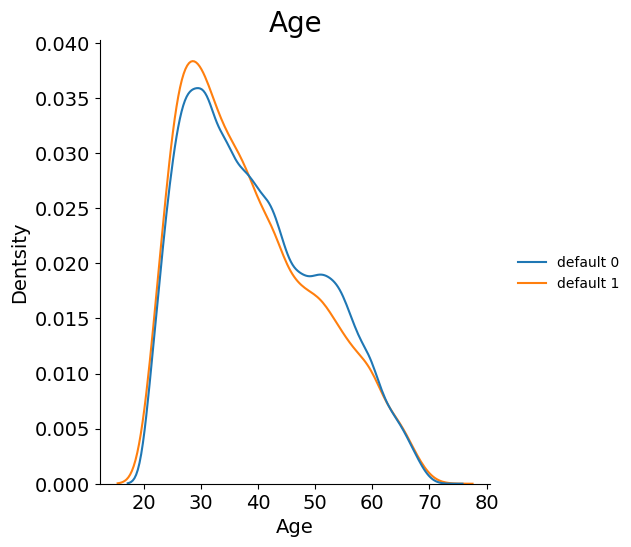

In [10]:
sns.displot({"default 0": df[df.default == 0].age,
             "default 1": df[df.default == 1].age},
             kind="kde",
             common_norm=False # normalization
)

plt.title('Age', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

### Distributions look pretty similar

## How the default flag groups by 'age' feature

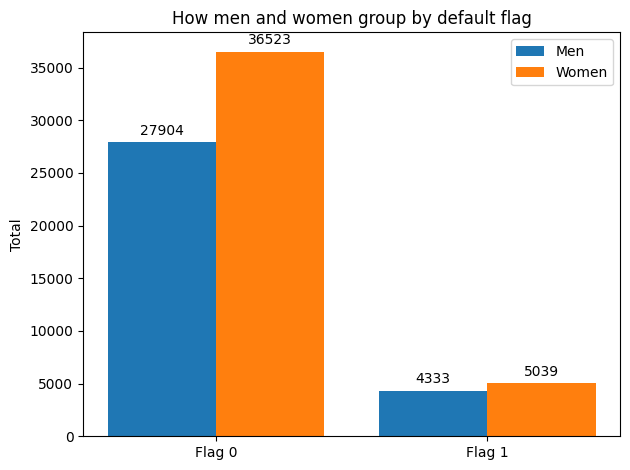

In [11]:
df = pd.read_csv('Credit-score-dataset.csv')
gender = {'M': 1,'F': 0}
df.sex = [gender[item] for item in df.sex]

labels = ['Flag 0', 'Flag 1']
men_values = [(df[df['default'] == 0].sex == 1).sum(), (df[df['default'] == 1].sex == 1).sum()]
women_values = [(df[df['default'] == 0].sex == 0).sum(), (df[df['default'] == 1].sex == 0).sum()]


x, width = np.arange(len(labels)), .4

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_values, width, label='Men')
rects2 = ax.bar(x + width/2, women_values, width, label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Total')
ax.set_title('How men and women group by default flag')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

# Education

### Let's take a look at a distribution of 'education' depending on the 'age'.

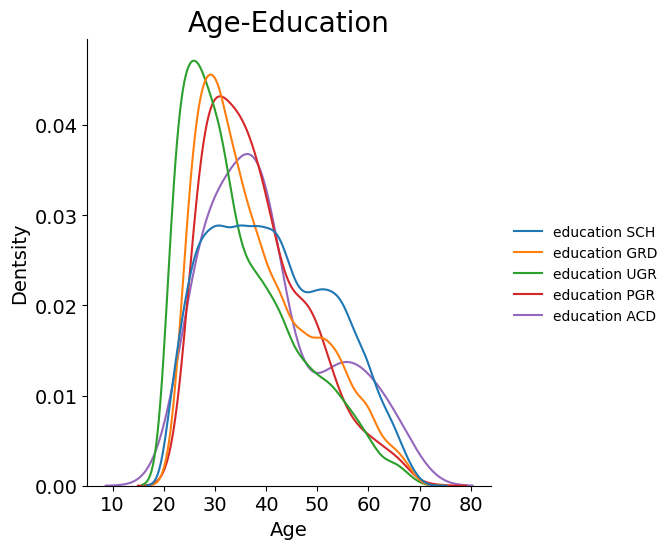

In [12]:
sns.displot(
    {
        "education SCH": df[df.education == 'SCH'].age,
        "education GRD": df[df.education == 'GRD'].age,
        "education UGR": df[df.education == 'UGR'].age,
        "education PGR": df[df.education == 'PGR'].age,
        "education ACD": df[df.education == 'ACD'].age,
    },
    kind="kde",
    common_norm=False
)

plt.title('Age-Education', fontsize=20)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);


#### If we take the SCH education (possibly another abbreviation), the age is shifted to the older side compared to the same UGR. For ACD (academic), the age distribution is shifted to the left when compared to PGR (postgraduate), which is understandable in principle. The youngest are UGR, there is a suggestion that they will be more "bad" borrowers.

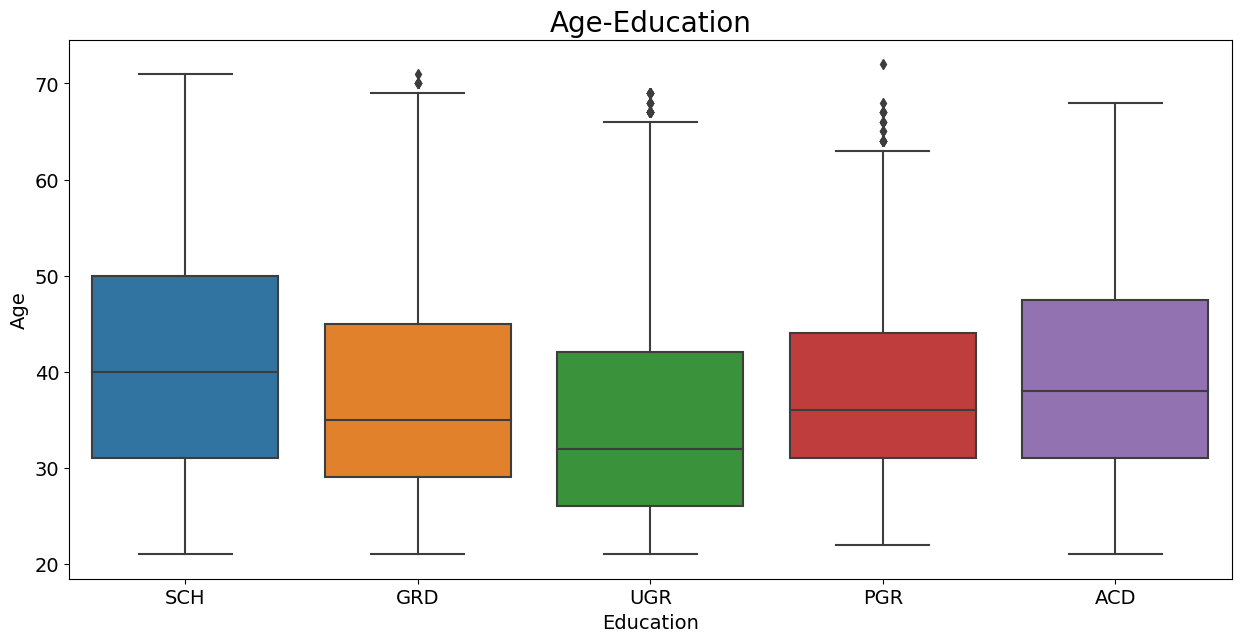

In [13]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', data=df)

plt.title('Age-Education', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

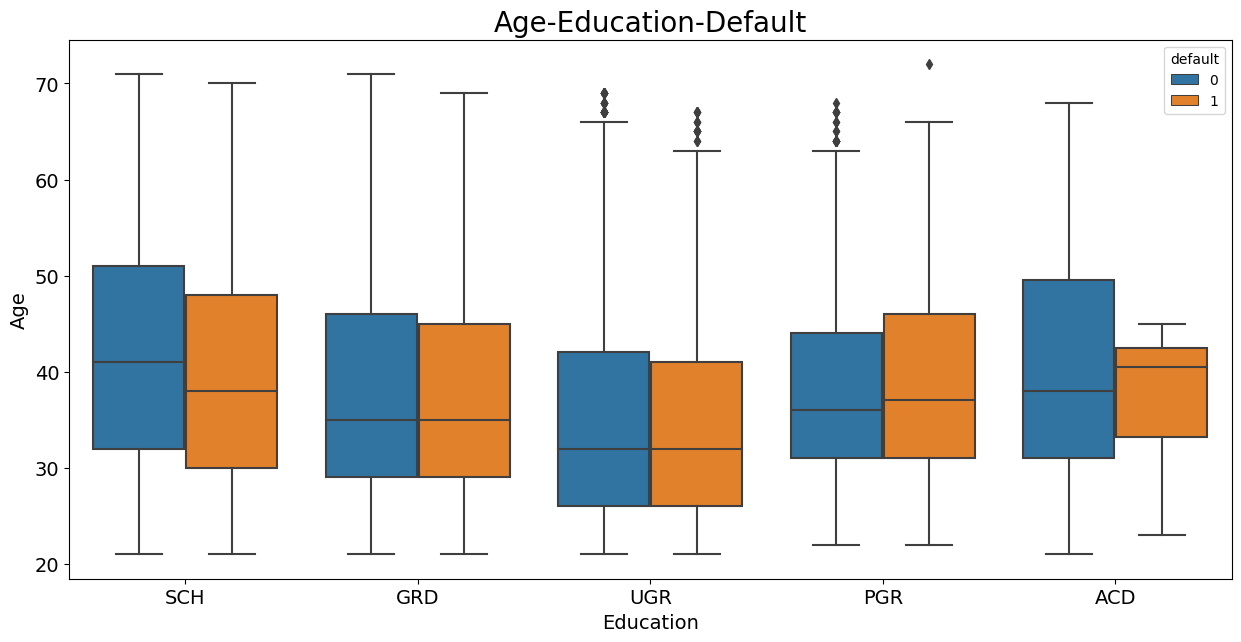

In [14]:
plt.figure(figsize=(15, 7))

sns.boxplot(x='education', y='age', hue='default', data=df)

plt.title('Age-Education-Default', fontsize=20)
plt.ylabel('Age', fontsize=14)
plt.xlabel('Education', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#### It is interesting that if we take the education level of PGR and ACD, the average age of "bad" borrowers is higher than that of "good" borrowers, but the range of values is high for both. Perhaps if we take some age limit, for example, from 30 to 50 years, then within this group, this indicator will not significantly affect the full repayment of the loan.

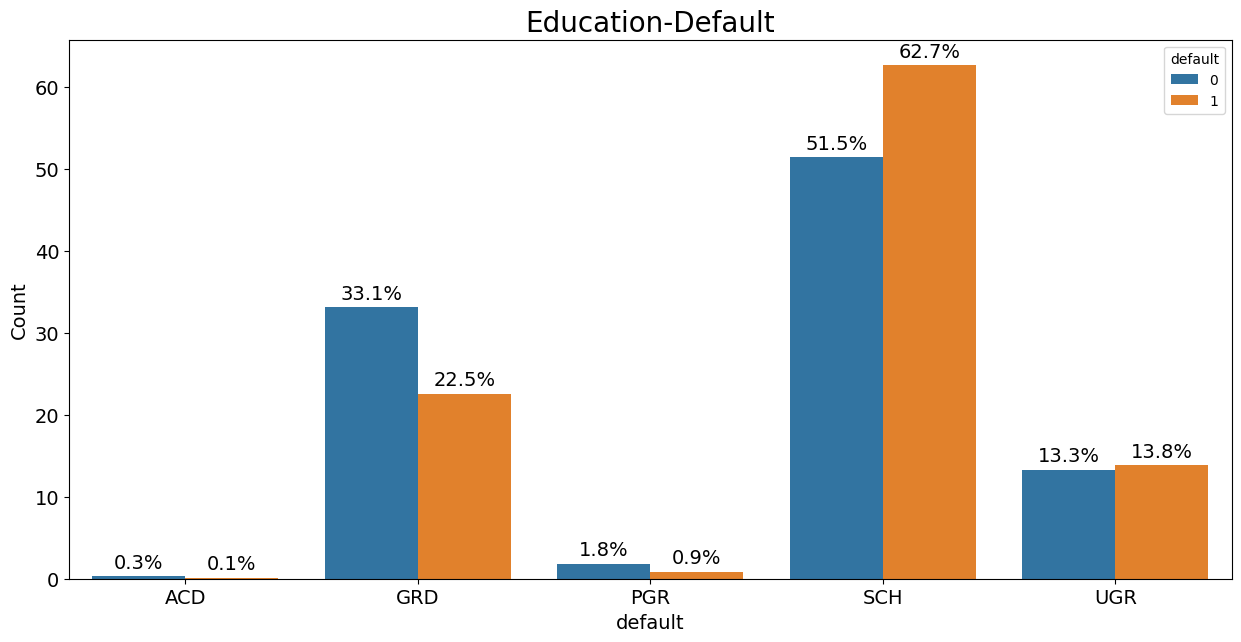

In [15]:
plt.figure(figsize=(15, 7))

educ_def = (df.groupby(['default'])['education']
            .value_counts(normalize=True)
            .rename('percentage')
            .mul(100)
            .reset_index()
            .sort_values('education'))

ax = sns.barplot(x="education", y="percentage", hue="default", data=educ_def)

for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())
    ax.annotate(percentage,  # текст
                (p.get_x() + p.get_width() / 2., p.get_height()),  # координата xy
                ha='center',  # центрирование
                va='center',
                xytext=(0, 10),
                textcoords='offset points',  # точка смещения относительно координаты
                fontsize=14)

plt.title('Education-Default', fontsize=20)
plt.ylabel('Count', fontsize=14)
plt.xlabel('default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

#### Similarly, we see that the percentage of defaulting borrowers is higher with the education level of SCH, for UGR the difference is not significant. In this case, age does not affect as much as the level of education. It can also be concluded that at some level GRD is more stable in terms of payment.


## Handling with empty values
### There is only one incomplete column – education with 307 missing values, as was found out before.
### Dtype of the column is 'Object' so we can fill it with Mode.

In [16]:
df[df.columns[df.isnull().any()]].isna().sum()

education    307
dtype: int64

In [17]:
df.education.value_counts() # mode is 'SCH' – 38860 values

SCH    38860
GRD    23365
UGR     9816
PGR     1257
ACD      194
Name: education, dtype: int64

In [18]:
# Filling empties
df.education = df.education.fillna(df.education.mode()[0])

## Correlation

### Let's take a look at the correlation matrix

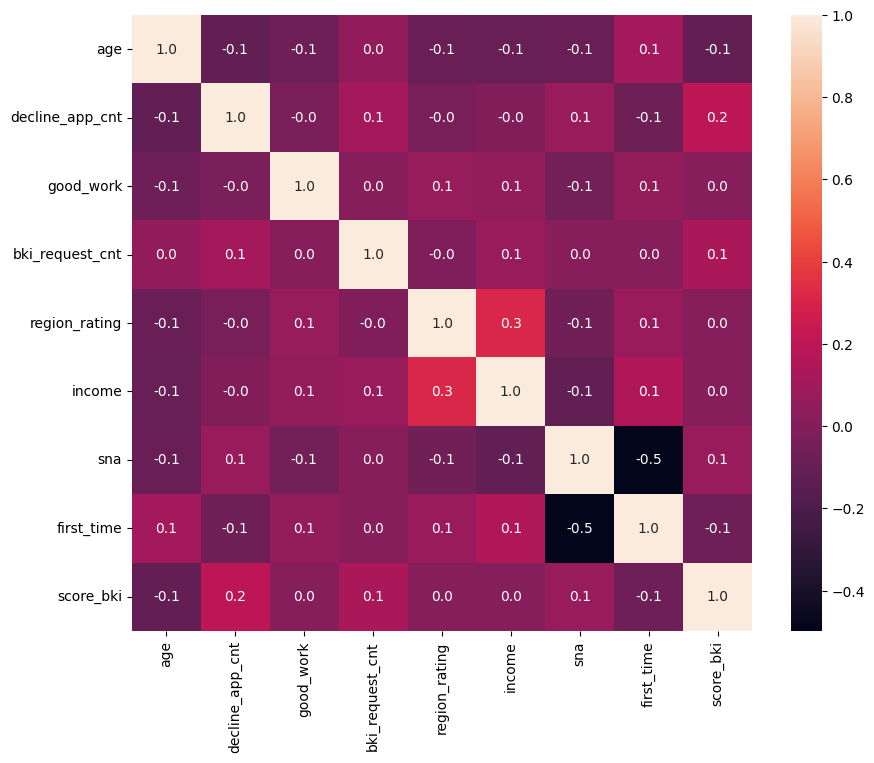

In [19]:
num_cols = ['age', 'decline_app_cnt', 'good_work', 'bki_request_cnt',
       'region_rating', 'income', 'sna', 'first_time', 'score_bki']

plt.figure(figsize=(10, 8))

sns.heatmap(df[num_cols].corr(method='spearman'), annot=True, fmt=".1f");

## Income

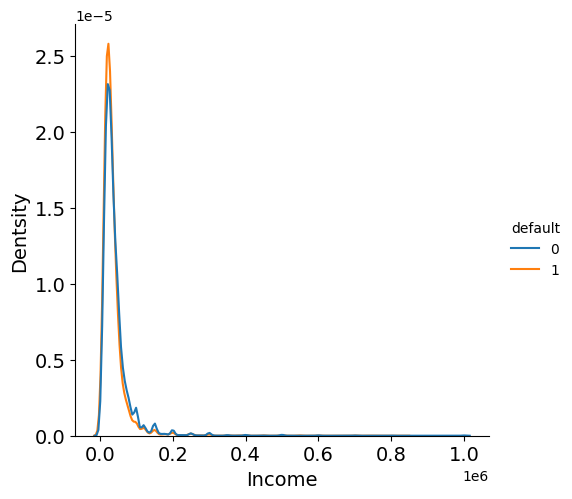

In [20]:
sns.displot(df, x='income', hue='default', kind="kde", common_norm=False)

plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

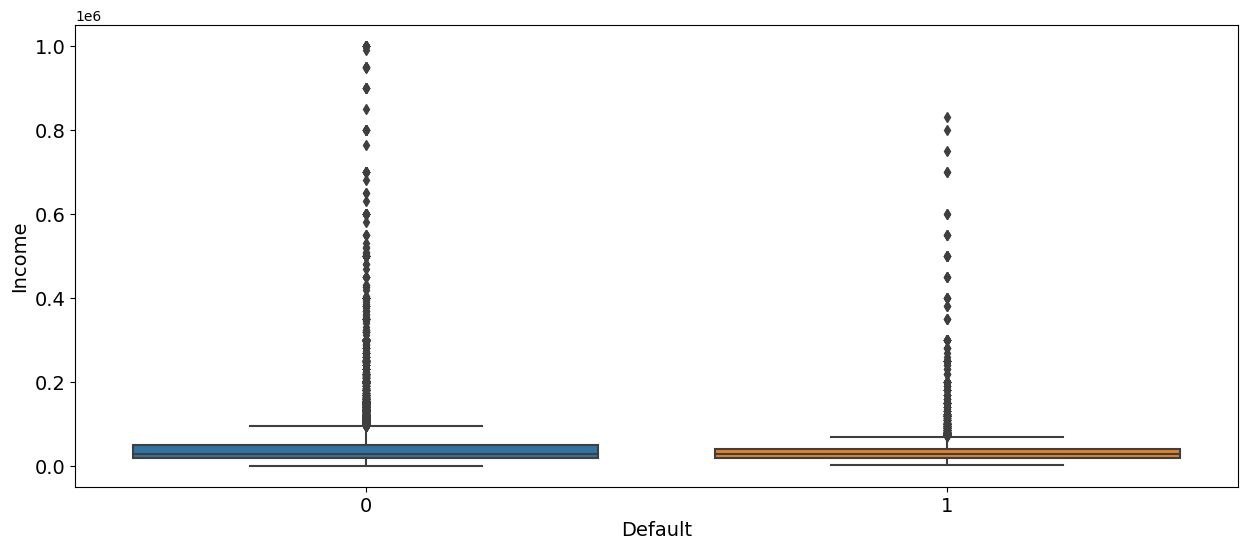

In [21]:
plt.figure(figsize=(15, 6))

sns.boxplot(x='default', y='income', data=df)

plt.ylabel('Income', fontsize=14)
plt.xlabel('Default', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

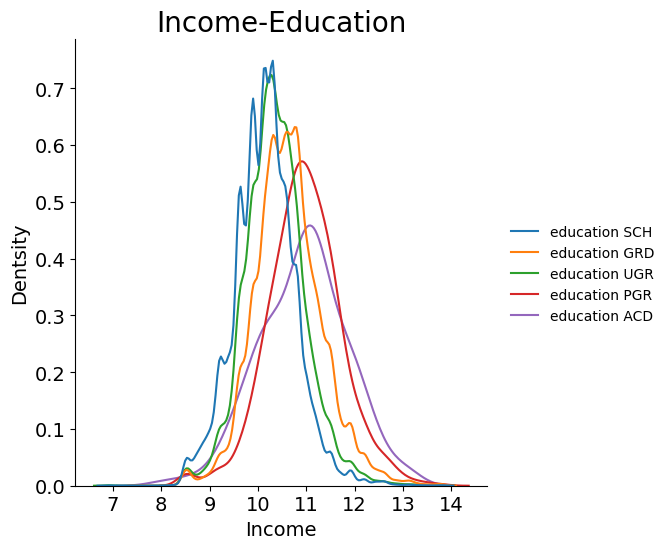

In [22]:
df_income = df.copy()
df_income.income = np.log(df.income+1)

sns.displot(
    {
        "education SCH": df_income[df_income.education == 'SCH'].income,
        "education GRD": df_income[df_income.education == 'GRD'].income,
        "education UGR": df_income[df_income.education == 'UGR'].income,
        "education PGR": df_income[df_income.education == 'PGR'].income,
        "education ACD": df_income[df_income.education == 'ACD'].income,
    },
    kind="kde",
    common_norm=False
)

plt.title('Income-Education', fontsize=20)
plt.xlabel('Income', fontsize=14)
plt.ylabel('Dentsity', fontsize=14)

plt.xticks(fontsize=14)
plt.yticks(fontsize=14);

## Feature engineering


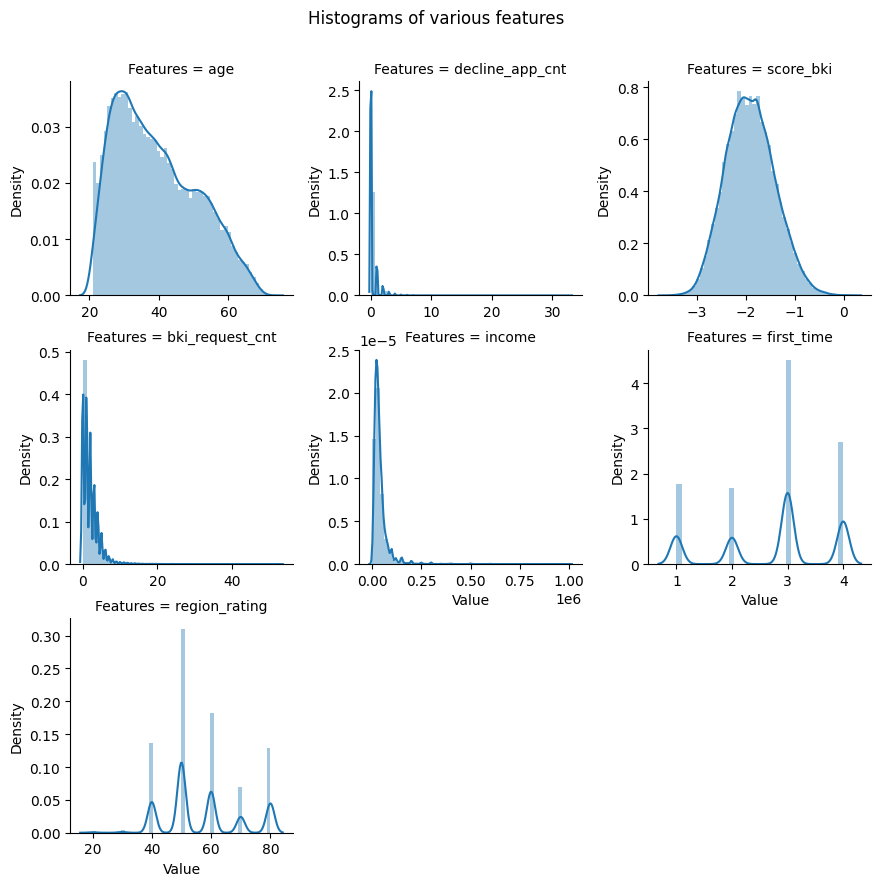

In [23]:
num_cols = ['age', 'decline_app_cnt', 'score_bki',
            'bki_request_cnt', 'income', 'first_time','region_rating']

numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");


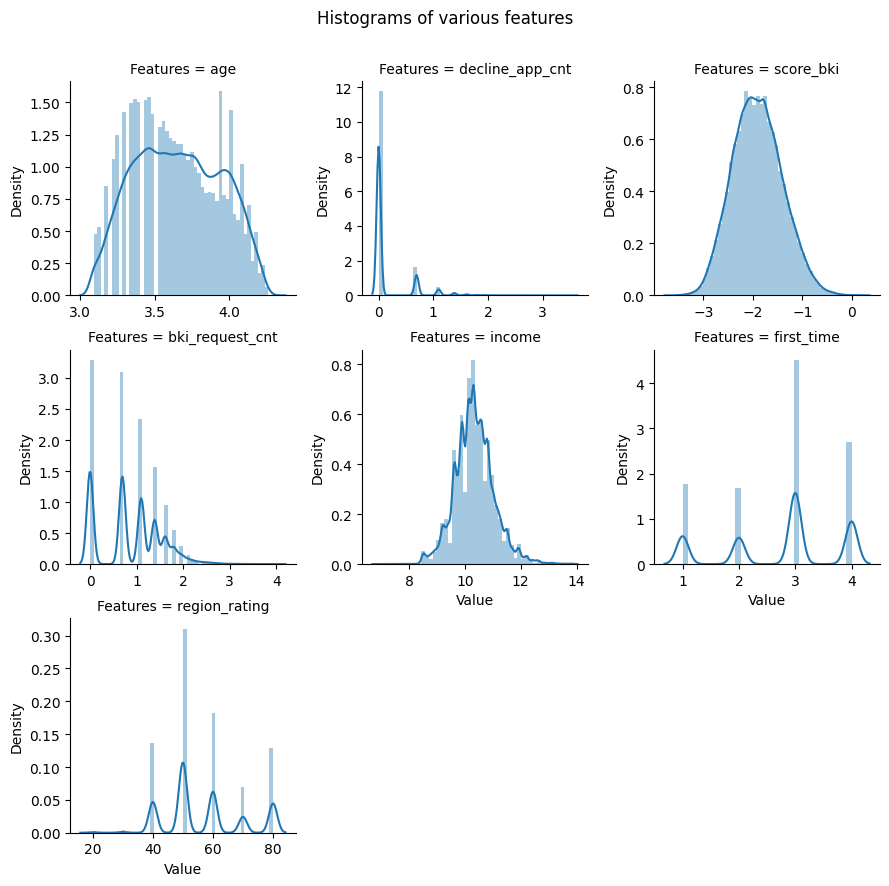

In [24]:
for i in ['age', 'decline_app_cnt', 'bki_request_cnt', 'income']:
    df[i] = np.log(df[i]+1)
    
numeric_features = df[num_cols]

numeric_features = numeric_features.stack().reset_index().rename(
    columns={"level_1": "Features", 0: "Value"})

ax = sns.FacetGrid(data=numeric_features, col="Features",
                  col_wrap=3, sharex=False, sharey=False)
ax = ax.map(sns.distplot, "Value")

plt.subplots_adjust(top=0.9)
plt.suptitle("Histograms of various features");

In [25]:
# New feature - Month
df['app_date'] = pd.to_datetime(df['app_date'], format='%d%b%Y')
df['month'] = df['app_date'].dt.month.astype(object)

df.drop(['app_date'],  axis=1, inplace=True)

In [26]:
# Mean income, taking into account the rating of the region
mean_inc_reg = df.groupby('region_rating')['income'].median().to_dict()
df['mean_income_region'] = df['region_rating'].map(mean_inc_reg)

In [27]:
# Mean income adjusted for age
mean_inc_age = df.groupby('age')['income'].median().to_dict()
df['mean_income_age'] = df['age'].map(mean_inc_age)

In [28]:
# Mean score bki taking into account age
mean_bki_age = df.groupby('age')['score_bki'].median().to_dict()
df['mean_bki_age'] = df['age'].map(mean_bki_age)

In [29]:
df.head()

,client_id,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,...,work_address,income,sna,first_time,foreign_passport,default,month,mean_income_region,mean_income_age,mean_bki_age
0,25905,SCH,1,4.143135,Y,Y,0.000000,0,-2.008753,0.693147,...,2,9.798183,4,1,N,0,2,10.126671,9.903538,-1.981476
1,63161,SCH,0,4.094345,N,N,0.000000,0,-1.532276,1.386294,...,3,9.852247,4,1,N,0,3,10.126671,9.998843,-1.994864
2,25887,SCH,1,3.258097,Y,N,1.098612,0,-1.408142,0.693147,...,2,10.308986,1,4,Y,0,2,10.757924,10.308986,-1.814637
3,16222,SCH,0,3.988984,N,N,0.000000,0,-2.057471,1.098612,...,3,9.210440,1,3,N,0,1,10.126671,10.212803,-1.993905
4,101655,GRD,1,3.891820,N,N,0.000000,1,-1.244723,0.693147,...,3,10.308986,1,4,Y,0,4,10.308986,10.308986,-1.988764


## Modeling

In [30]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address',
       'foreign_passport', 'sna', 'month']

df_label = pd.get_dummies(df, columns=cat_cols,
                          drop_first=True).drop('client_id', axis=1)

In [31]:
df_label.head()

,age,decline_app_cnt,score_bki,bki_request_cnt,region_rating,income,first_time,default,mean_income_region,mean_income_age,...,home_address_3,work_address_2,work_address_3,foreign_passport_Y,sna_2,sna_3,sna_4,month_2,month_3,month_4
0,4.143135,0.000000,-2.008753,0.693147,50,9.798183,1,0,10.126671,9.903538,...,0,1,0,0,0,0,1,1,0,0
1,4.094345,0.000000,-1.532276,1.386294,50,9.852247,1,0,10.126671,9.998843,...,0,0,1,0,0,0,1,0,1,0
2,3.258097,1.098612,-1.408142,0.693147,80,10.308986,4,0,10.757924,10.308986,...,0,1,0,1,0,0,0,1,0,0
3,3.988984,0.000000,-2.057471,1.098612,50,9.210440,3,0,10.126671,10.212803,...,0,0,1,0,0,0,0,0,0,0
4,3.891820,0.000000,-1.244723,0.693147,60,10.308986,4,0,10.308986,10.308986,...,0,0,1,1,0,0,0,0,0,1


In [32]:
X = df_label.drop('default', axis=1)
y = df_label['default']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, stratify=y, shuffle=True, random_state=10)

## Baseline

In [33]:
lr = LogisticRegression(class_weight = 'balanced')
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)
y_score = lr.predict_proba(X_test)[:,1]

print('roc-auc:', roc_auc_score(y_test, y_score))
print('precision:', precision_score(y_test, y_pred))
print('recall:', recall_score(y_test, y_pred))
print('f1:', f1_score(y_test, y_pred))
print('logloss:', log_loss(y_test, y_pred))


roc-auc: 0.7292615344656406
precision: 0.2309770373705538
recall: 0.6568501920614597
f1: 0.34177215189873417
logloss: 11.097559003049478


#### Jeśli bankowi bardziej opłaca się przewidzieć więcej „złych” klientów, aby uniknąć dużych strat, to lepiej skupić się na metryce wycofania, jeśli porównamy w linii bazowej i innych algorytmach, inaczej precyzji.

In [34]:
metrics = pd.DataFrame(
    index=['roc-auc', 'precision', 'recall', 'f1', 'logloss'])

metrics['Baseline_LR'] = [roc_auc_score(y_test, y_score),
                          precision_score(y_test, y_pred),
                          recall_score(y_test, y_pred),
                          f1_score(y_test, y_pred),
                          log_loss(y_test, y_pred)]

metrics

,Baseline_LR
roc-auc,0.729262
precision,0.230977
recall,0.656850
f1,0.341772
logloss,11.097559


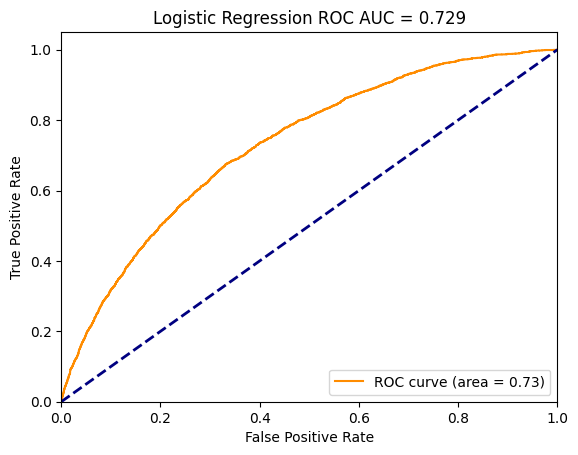

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_score)

roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [36]:
parameters_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': np.linspace(1, 1000, num=5),
    'solver': ['sag', 'saga', 'lbfgs'],
    'l1_ratio': [0.25, 0.5, 0.75],
    'max_iter': np.arange(100, 500, 100)
}

lr = LogisticRegression(class_weight='balanced')
cv = StratifiedKFold(n_splits=3, shuffle=True)
grid_cv = GridSearchCV(lr, parameters_grid,
                       scoring='roc_auc', cv=cv, verbose=2)


In [37]:
best_params = {'C': 500.5, 
               'l1_ratio': 0.25,
               'max_iter': 400, 
               'penalty': 'l2', 
               'solver': 'lbfgs'}

In [38]:
lr_gr = LogisticRegression(**best_params, class_weight='balanced')
lr_gr.fit(X_train, y_train)

y_pred_gr = lr_gr.predict(X_test)
y_score_gr = lr_gr.predict_proba(X_test)[:,1]

print('roc-auc:', roc_auc_score(y_test, y_score_gr))
print('precision:', precision_score(y_test, y_pred_gr))
print('recall:', recall_score(y_test, y_pred_gr))
print('f1:', f1_score(y_test, y_pred_gr))
print('logloss:', log_loss(y_test, y_pred_gr))

roc-auc: 0.7299955554909006
precision: 0.23233838308084595
recall: 0.6611182244985062
f1: 0.34384017758046614
logloss: 11.06760641660486


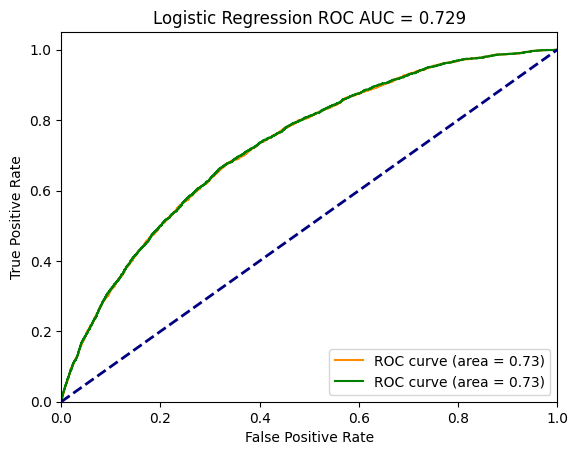

In [39]:
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_score_gr)

roc_auc_2 = auc(fpr_2, tpr_2)

plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot(fpr_2, tpr_2, color='green', label='ROC curve (area = %0.2f)' % roc_auc_2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.legend(loc="lower right")
plt.show()

In [40]:
metrics['Grid_LR'] = [roc_auc_score(y_test, y_score_gr),
                      precision_score(y_test, y_pred_gr),
                      recall_score(y_test, y_pred_gr),
                      f1_score(y_test, y_pred_gr),
                      log_loss(y_test, y_pred_gr)]

metrics[:-1].style.highlight_max(axis=1, color='lightblue')

,Baseline_LR,Grid_LR
roc-auc,0.729262,0.729996
precision,0.230977,0.232338
recall,0.656850,0.661118
f1,0.341772,0.343840


## Analysis of important features 

In [41]:
import shap


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

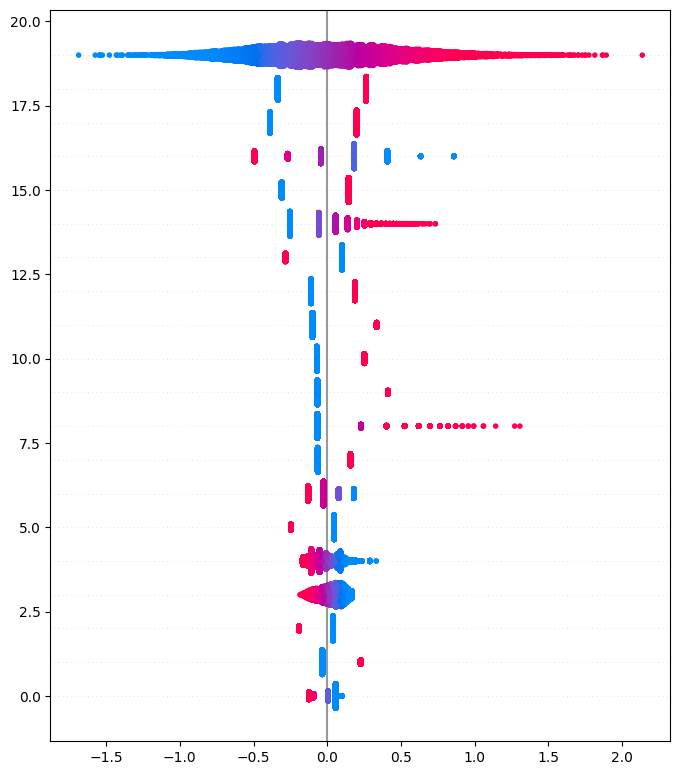

In [42]:
cat_cols = ['education', 'sex', 'car', 'car_type', 'good_work', 'home_address', 'work_address',
       'foreign_passport', 'sna', 'month']

explainer = shap.LinearExplainer(lr_gr, X_train, feature_dependence="independent")
shap_values = explainer(X_test)

# summary plot
shap.summary_plot(shap_values, X_test)

#### Features are arranged according to their importance along the OY axis, along the OX axis is the Shapley value. Each point is a single observation.

#### The color indicates the values of the corresponding attribute: red - high, blue - low.

### Consider an example:

#### 1. the greater the value of the score_bki feature, the greater the probability of default;
#### 2. the higher the value of the age attribute, the lower the probability of default.

#### Compare with weights from logistic regression, and also check for several features

In [43]:
lr_gr.coef_

array([[-0.29200554,  0.42697682,  1.0068048 ,  0.28213279, -0.02254423,
        -0.03455544, -0.10315105, -0.28741044,  0.34190745, -1.26179116,
         0.22202584,  0.12080136,  0.59987036,  0.47839613,  0.29770552,
         0.00459183, -0.29371551, -0.20253123,  0.58679125,  0.10545425,
         0.32224452,  0.45451258, -0.22981889,  0.26030861,  0.17595832,
         0.43564053, -0.02519147, -0.06621495, -0.38335925]])

In [44]:
feature_imp = pd.DataFrame()
feature_imp['feature'] = X.columns
feature_imp['imp'] = lr_gr.coef_[0]
feature_imp = feature_imp.sort_values(by='imp', ascending=False)

In [45]:
feature_imp

,feature,imp
2,score_bki,1.006805
12,education_SCH,0.599870
18,home_address_2,0.586791
13,education_UGR,0.478396
21,work_address_3,0.454513
25,sna_4,0.435641
1,decline_app_cnt,0.426977
8,mean_income_age,0.341907
20,work_address_2,0.322245
14,sex_1,0.297706


In [46]:
df_label.groupby('default')[['score_bki']].median()

,score_bki
default,
0,-1.956982
1,-1.683857


In [47]:
vals = np.abs(shap_values.values).mean(0)
feature_names = X_train

feature_importance = pd.DataFrame(list(zip(feature_names, vals)),
                                  columns=['col_name', 'feature_importance_vals'])
feature_importance.sort_values(by=['feature_importance_vals'],
                               ascending=False, inplace=True)

In [48]:
cols_show = list(set(feature_importance.col_name[:15]) & set(num_cols))
cols_show

['decline_app_cnt',
 'region_rating',
 'first_time',
 'score_bki',
 'bki_request_cnt']

In [49]:
df_label[cols_show + ['default']].groupby('default')[cols_show].mean().T

default,0,1
decline_app_cnt,0.135281,0.270484
region_rating,57.169044,53.677977
first_time,2.806106,2.486022
score_bki,-1.938048,-1.675637
bki_request_cnt,0.858317,1.013421
